# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [181]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
# load imdb dataset as pandas dataframe
imdb_df = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 1 - Assignment/Pandas Exercise/data/imdb_1000.csv')

In [183]:
# show first 5 rows of imdb_df
imdb_df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [184]:
# load bikes dataset as pandas dataframe
bikes_df = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 1 - Assignment/Pandas Exercise/data/bikes.csv',sep =';',parse_dates=['Date'],dayfirst=True, index_col='Date')

In [185]:
# show first 3 rows of bikes_df
bikes_df.head(3)

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [186]:
# list columns of imdb_df
imdb_df.keys()
#or imdb_df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [187]:
# what are the datatypes of values in columns
imdb_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [188]:
# list first 5 movie titles
imdb_df['title'].head(5)

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [189]:
# show only movie title and genre
imdb_df[['title','genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [190]:
# show the type of duration column
type(imdb_df['duration'])
imdb_df['duration'].dtype

dtype('int64')

In [191]:
# show duration values of movies as numpy arrays
imdb_df['duration'].values

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [192]:
# convert all the movie titles to uppercase
def upp(x):
    return str(x).upper()
imdb_df['title'] = imdb_df['title'].apply(upp)
imdb_df['title']

0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

In [193]:
import matplotlib.pyplot as plt

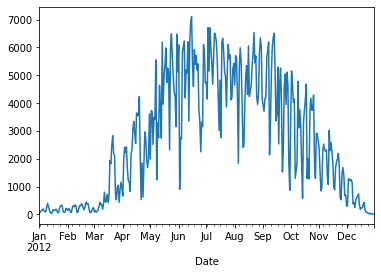

In [194]:
# plot the bikers travelling to Berri1 over the year
bikes_df['Berri1'].plot()

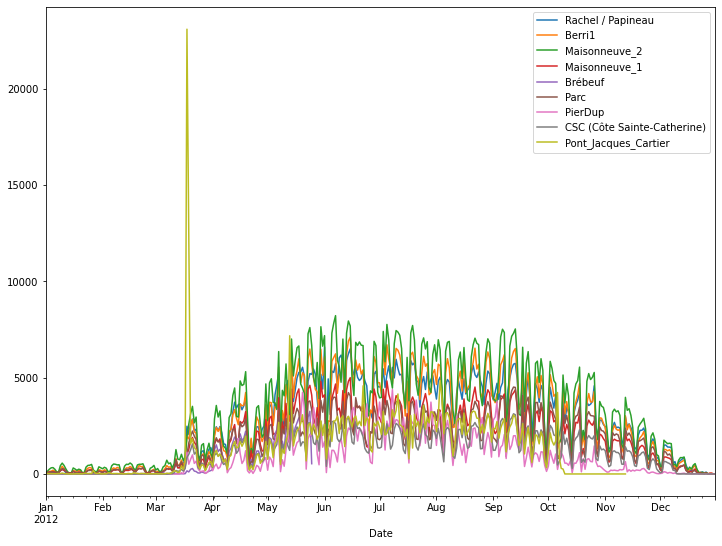

In [195]:
# plot all the columns of bikes_df
bikes_df.plot(figsize=(12,9))

## Value counts

Get count of unique values in a particular column/Series.

In [196]:
# what are the unique genre in imdb_df?
imdb_df['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [197]:
x = imdb_df['genre'].value_counts()
x

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

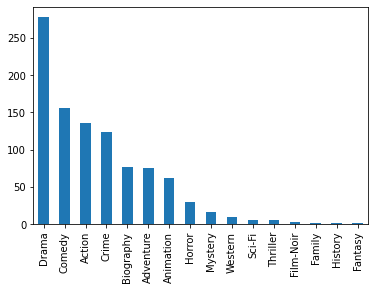

In [198]:
# plotting value counts of unique genres as a bar chart
x.plot.bar()

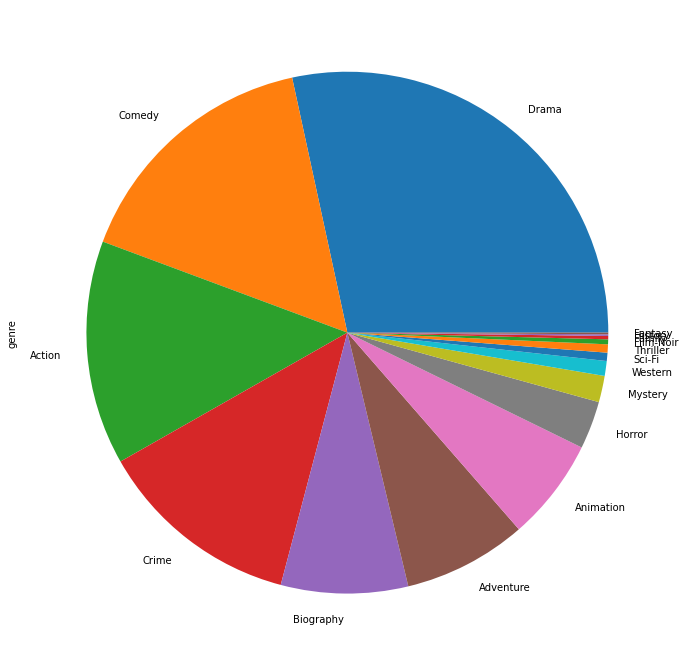

In [199]:
# plotting value counts of unique genres as a pie chart
x.plot.pie(figsize=(12,12))

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [200]:
# show index of bikes_df
bikes_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [201]:
# get row for date 2012-01-01
print(bikes_df.loc['2012-01-01'])

Unnamed: 1                     00:00
Rachel / Papineau                 16
Berri1                            35
Maisonneuve_2                     51
Maisonneuve_1                     38
Brébeuf                          5.0
Parc                              26
PierDup                           10
CSC (Côte Sainte-Catherine)        0
Pont_Jacques_Cartier            27.0
Name: 2012-01-01 00:00:00, dtype: object


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [202]:
# show 11th row of imdb_df using iloc
imdb_df.iloc[10]

star_rating                                                     8.8
title             THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING
content_rating                                                PG-13
genre                                                     Adventure
duration                                                        178
actors_list       [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
Name: 10, dtype: object

## Selecting rows where column has a particular value

In [203]:
# select only those movies where genre is adventure
imdb_df[imdb['genre']=='Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,THE LORD OF THE RINGS: THE RETURN OF THE KING,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,THE LORD OF THE RINGS: THE FELLOWSHIP OF THE RING,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,THE LORD OF THE RINGS: THE TWO TOWERS,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,INTERSTELLAR,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,BACK TO THE FUTURE,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
...,...,...,...,...,...,...
936,7.4,TRUE GRIT,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
937,7.4,LABYRINTH,PG,Adventure,101,"[u'David Bowie', u'Jennifer Connelly', u'Toby ..."
943,7.4,THE BUCKET LIST,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
953,7.4,THE NEVERENDING STORY,PG,Adventure,102,"[u'Noah Hathaway', u'Barret Oliver', u'Tami St..."


In [204]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
imdb_df['genre'][(imdb_df['star_rating']>8)&(imdb_df['duration']>130)].value_counts()
#drama

Drama        36
Action       20
Adventure    17
Crime        13
Biography    12
Western       6
Comedy        6
Mystery       3
Horror        1
Animation     1
Name: genre, dtype: int64

## Adding a new column to DataFrame

In [205]:
import datetime

In [206]:
# add a weekday column to bikes_df
def week(z):
    return z.strftime("%a")
def weekn(z):
    return z.strftime("%w")
bikes_df['weekday'] = bikes_df.index
bikes_df['weekday'] = bikes_df['weekday'].apply(weekn)
# or bikes_df['weekday'] = bikes_df.index.weekday
bikes_df

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0,0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0,1
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0,2
2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0,3
2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0,4
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,00:00,8,12,7,4,NaN,1,2,0,NaN,4
2012-12-28,00:00,0,35,3,38,NaN,0,0,0,NaN,5
2012-12-29,00:00,0,27,8,42,NaN,9,0,0,NaN,6


## Deleting an existing column from DataFrame

In [207]:
# remove column 'Unnamed: 1' from bikes_df
try:
    bikes_df.drop('Unnamed: 1', axis=1, inplace=True)
except:
    pass
bikes_df

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,5.0,26,10,0,27.0,0
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,1
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,2
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,3
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,4
...,...,...,...,...,...,...,...,...,...,...
2012-12-27,8,12,7,4,NaN,1,2,0,NaN,4
2012-12-28,0,35,3,38,NaN,0,0,0,NaN,5
2012-12-29,0,27,8,42,NaN,9,0,0,NaN,6


## Deleting a row in DataFrame

In [208]:
# remove row no. 1 from bikes_df
bikes_df.drop(bikes_df.index[0]).head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier,weekday
Date,,,,,,,,,,
2012-01-02,43,83,153,68,11.0,53,6,1,21.0,1
2012-01-03,58,135,248,104,2.0,89,3,2,15.0,2
2012-01-04,61,144,318,116,2.0,111,8,1,19.0,3
2012-01-05,95,197,330,124,6.0,97,13,2,16.0,4
2012-01-06,75,146,244,98,4.0,86,4,0,17.0,5


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [209]:
# group imdb_df by movie genres
x = imdb_df.groupby(['genre'])

In [210]:
# get crime movies group
x.get_group('Crime')['duration'].mean()

122.29838709677419

In [211]:
# get mean of movie durations for each group
imdb_df.groupby(['genre'])['duration'].mean()
# or x.aggregate('mean')

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [213]:
# change duration of all movies in a particular genre to mean duration of the group
imdb_df['new_duration'] = 0
for i in imdb_df['genre'].unique():
    imdb_df['new_duration'][imdb_df['genre'] == str(i)] = x.get_group(str(i))['duration'].mean()
# or, imdb_df['new_duration'] = x['duration'].transform(lambda a:a.mean())
imdb_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,star_rating,title,content_rating,genre,duration,actors_list,new_duration
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",122.298387
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",122.298387
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",122.298387
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",126.485294
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",122.298387


In [219]:
# drop groups/genres that do not have average movie duration greater than 120.
new_imdb_df = x.filter(lambda a: a['duration'].mean() > 120)
new_imdb_df

,star_rating,title,content_rating,genre,duration,actors_list,new_duration
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",122.298387
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",122.298387
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",122.298387
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",126.485294
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",122.298387
...,...,...,...,...,...,...,...
972,7.4,BLUE VALENTINE,NC-17,Drama,112,"[u'Ryan Gosling', u'Michelle Williams', u'John...",126.539568
973,7.4,THE CIDER HOUSE RULES,PG-13,Drama,126,"[u'Tobey Maguire', u'Charlize Theron', u'Micha...",126.539568
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",134.840000
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",126.485294


In [232]:
# group weekday wise bikers count
weekwise = bikes_df.groupby('weekday')

In [233]:
# get weekday wise biker count
weekwise = weekwise.aggregate(sum)
weekwise

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
weekday,,,,,,,,,
0,122115,102447,102272,57438,12032.0,52419,62070,37867,84638.0
1,138881,142285,174610,95565,15436.0,97001,47259,64011,74692.0
2,131632,145795,179939,99421,10629.0,100007,35901,63503,53552.0
3,144531,163603,200273,112344,14876.0,110820,44045,72047,63472.0
4,150971,169976,210039,118633,15679.0,113675,46117,73215,62174.0
5,146979,150493,183961,104584,12259.0,96569,43217,59856,62164.0
6,118560,105635,109902,64872,11170.0,51019,53360,35507,54493.0


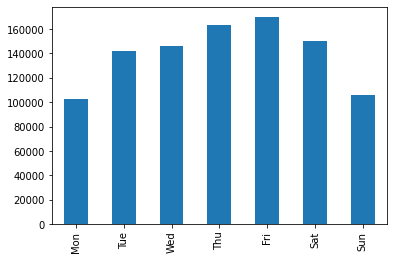

In [235]:
# plot weekday wise biker count for 'Berri1'
weekwise.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekwise['Berri1'].plot.bar()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)